In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = payload[0]
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [3]:
def calculation_crrelation(sector, num, start_date, end_date):
    GICS_sector_df = df[df['GICS Sector'] == sector]
    tickers_symbols = GICS_sector_df['Symbol'].values.tolist()
    print(tickers_symbols[:num])
    
    tickers_lists = tickers_symbols[:num]
    data_adj_close = pd.DataFrame(columns=tickers_lists)
    for ticker in tickers_lists:
        data_adj_close[ticker] = yf.download(ticker, start_date, end_date)['Adj Close']
        
    ((data_adj_close.pct_change()+1).cumprod()).plot(figsize=(10, 7))
    plt.legend()
    plt.title("Adjusted Close Price", fontsize=16)
    plt.ylabel('Price', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    plt.show()
    
    corr = data_adj_close.corr()
    corr_heatmap = sns.heatmap(corr, vmax=.3, center=0,square=True, linewidths=.5, 
                               cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
    sns.despine()
    corr_heatmap.figure.set_size_inches(14,10)
    plt.show()

['ABT', 'ABBV', 'ABMD', 'A', 'ALGN', 'ABC', 'AMGN', 'ANTM', 'BAX', 'BDX', 'BIO', 'TECH', 'BIIB', 'BSX', 'BMY']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 co

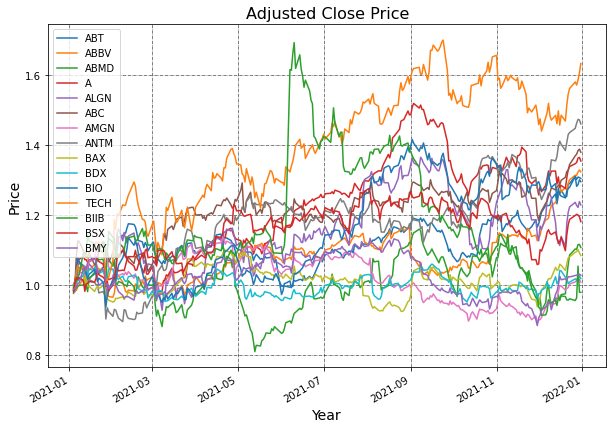

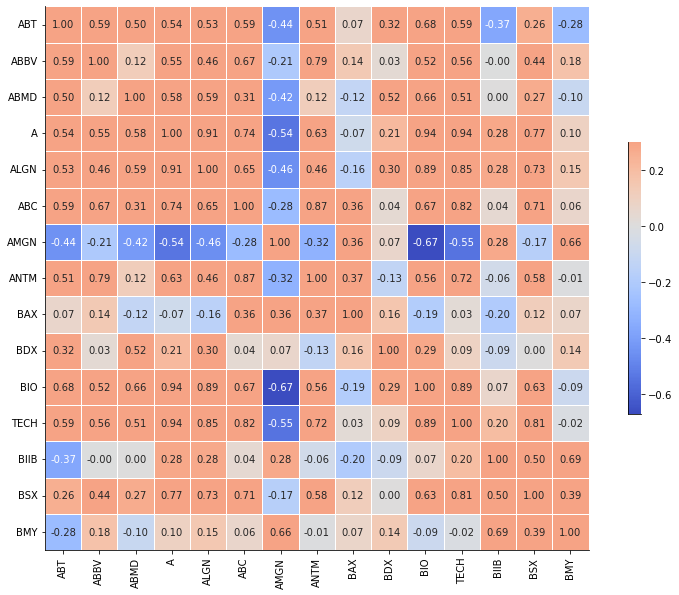

In [4]:
calculation_crrelation('Health Care', 15, '2021-01-01','2022-01-01')

['ACN', 'ADBE', 'ADP', 'AKAM', 'AMD', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'AVGO', 'BR', 'CDNS']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1

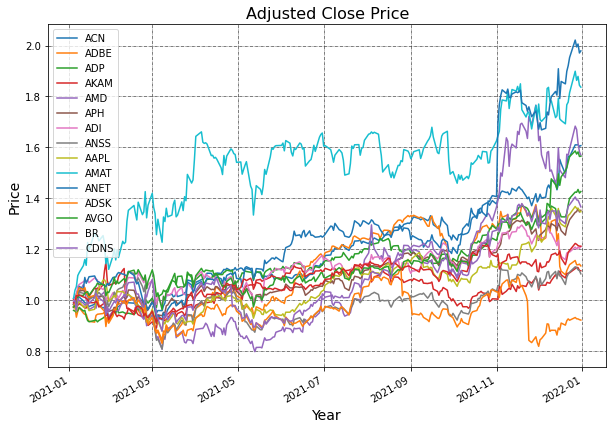

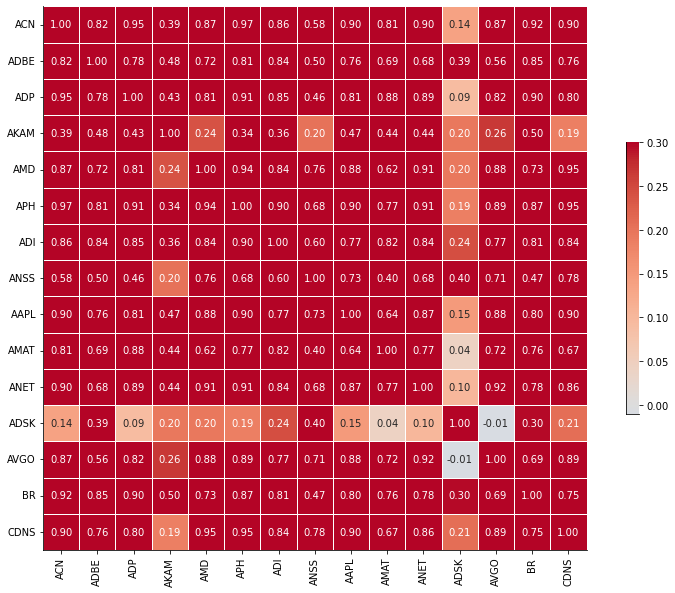

In [5]:
calculation_crrelation('Information Technology', 15, '2021-01-01','2022-01-01')